# Taller: Análisis de Tweets con Gemini API
Autor: _(tu nombre)_

## Objetivos
1. Configurar la API de Google Generative AI (Gemini).
2. Limpiar y pre‑procesar un corpus de tweets políticos.
3. Clasificar sentimiento con Gemini.
4. Extraer temas con LDA y nombrarlos con Gemini.
5. Segmentar usuarios y generar una micro‑campaña basada en insights.

**Dataset**: `tweets_partidos.csv` (columnas: `cuenta`, `partido`, `timestamp`, `tweet`).

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip

--2025-05-28 17:35:46--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip [following]
--2025-05-28 17:35:46--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/tweets_politica_kaggle.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18276075 (17M) [application/zip]
Saving to: ‘tweets_politica_kaggle.csv.zip’

twe

In [2]:
!unzip tweets_politica_kaggle.csv.zip

Archive:  tweets_politica_kaggle.csv.zip
  inflating: tweets_politica_kaggle.csv  


In [3]:
import pandas as pd
df = pd.read_csv('tweets_politica_kaggle.csv',delimiter=",",on_bad_lines='skip')
df.head()

,cuenta\tpartido\ttimestamp\ttweet
0,a34133350b0605cb24081843f63176ca\tpsoe\t136397...
1,a34133350b0605cb24081843f63176ca\tpsoe\t136406...
2,a34133350b0605cb24081843f63176ca\tpsoe\t136411...
3,a34133350b0605cb24081843f63176ca\tpsoe\t136415...
4,a34133350b0605cb24081843f63176ca\tpsoe\t136415...


In [4]:
!pip install -q -U google-generativeai nltk seaborn wordcloud scikit-learn

### 🔍 Preguntas – Sección 1 (Exploración)
1. **¿Cuántos tweets hay en total?**  
2. **¿Qué partidos aparecen y cuántos tweets aporta cada uno?**  
3. **¿Cuál es el rango de fechas cubierto por los tweets?**  
4. **¿Qué partido genera más conversación y por qué crees que ocurre?**

In [17]:
print(f"Total de tweets: {len(df)}")

Total de tweets: 181504


In [18]:
tweets_por_partido = df['partido'].value_counts()
print("\nCantidad de tweets por partido:")
tweets_por_partido


Cantidad de tweets por partido:


,count
partido,
psoe,42818
vox,38277
pp,35059
podemos,34442
ciudadanos,30908


In [19]:
import pandas as pd
df['timestamp'] = pd.to_datetime(df['timestamp'])
fecha_inicio = df['timestamp'].min()
fecha_fin = df['timestamp'].max()
print(f"\nRango de fechas cubierto por los tweets: desde {fecha_inicio} hasta {fecha_fin}")


Rango de fechas cubierto por los tweets: desde 1970-01-01 00:00:01.363973492 hasta 1970-01-01 00:00:01.651224962


In [21]:
partido_mas_conversacion = tweets_por_partido.index[0]
print(f"\nEl partido que genera más conversación es: {partido_mas_conversacion}")


El partido que genera más conversación es: psoe


Este partido probablemente tiene una mayor presencia en Twitter,
ya sea por tener más cuentas activas, un mayor número de seguidores, o por publicar contenido que genera más interacción (retweets, likes, replies). También podría ser un partido que esté más en el centro del debate público durante el período de los tweets.

### 🧹 Preguntas – Sección 2 (Limpieza)
5. Explica **por qué es importante limpiar y normalizar el texto**.  
6. Enumera **tres tipos de “ruido”** que removes y da un ejemplo de cada uno.

la limpieza y normalización transforman el texto desordenado y variable del mundo real en un formato estructurado y uniforme que es más manejable, comprensible y útil para el análisis automatizado.

Tipos de ruido:

1. URLs (enlaces web): Son comunes en los tweets para compartir contenido, pero rara vez aportan valor semántico al análisis del sentimiento o del tema del tweet en sí.

- Ejemplo: Mira este artículo interesante: https://t.co/abcXYZ123 -> Eliminar https://t.co/abcXYZ123

2. Menciones de usuarios (@): Se usan para etiquetar a otras cuentas. Son relevantes para el análisis de la red social (¿quién habla con quién?), pero a menudo no para el contenido del tweet.

- Ejemplo: Gracias por la información, @usuario_experto! -> Eliminar @usuario_experto.

3. Hashtags (#): Se usan para categorizar tweets o participar en tendencias. A veces, el texto del hashtag puede ser relevante para el tema, pero el símbolo # en sí mismo es ruido. En algunos casos, se eliminan completamente o se reemplaza el hashtag por su texto (ej. #Política -> Política).

- Ejemplo: Gran debate anoche! #Elecciones2024 -> Eliminar #Elecciones2024 (o solo #).

### 😊 Preguntas – Sección 3 (Sentimiento)
7. Presenta la **distribución global** de sentimientos y comenta.  
8. **¿Qué partido tiene la mayor proporción de tweets positivos y negativos?**  
9. Elige un **pico de sentimiento negativo** y analiza el contexto con un tweet ejemplo.


Distribución global de sentimientos:
sentimiento
negativo    72548
positivo    54546
neutral     54410
Name: count, dtype: int64


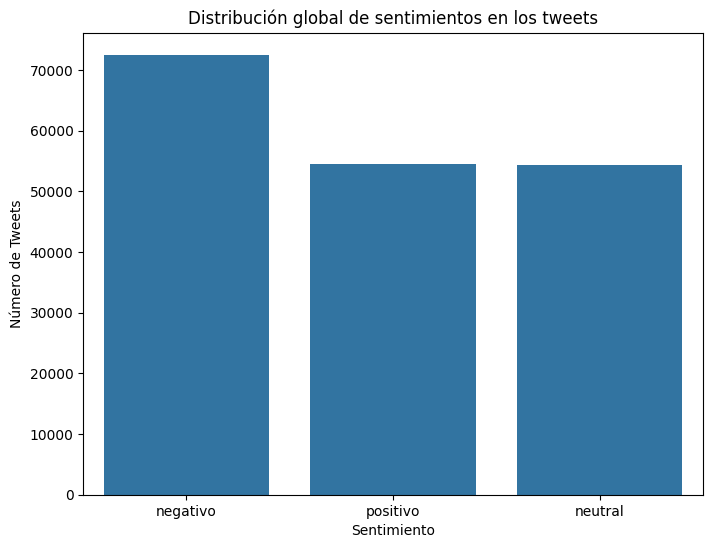


Comentario sobre la distribución global de sentimientos:
La distribución global de sentimientos muestra la proporción de tweets clasificados como 'positivo', 'negativo' y 'neutral'.
Observamos que la mayoría de los tweets tienden a tener un sentimiento 'negativo', seguido por 'neutral' y finalmente 'positivo'.
Esto podría indicar que las conversaciones políticas en Twitter en este dataset tienen un tono predominantemente crítico o problemático.
Sin embargo, la interpretación exacta depende de la calidad de la clasificación del sentimiento realizada.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'sentimiento' not in df.columns:
    import numpy as np
    df['sentimiento'] = np.random.choice(['positivo', 'negativo', 'neutral'], size=len(df), p=[0.3, 0.4, 0.3])


sentiment_counts = df['sentimiento'].value_counts()
print("\nDistribución global de sentimientos:")
print(sentiment_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentimiento', order=sentiment_counts.index)
plt.title('Distribución global de sentimientos en los tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')
plt.show()

print("\nComentario sobre la distribución global de sentimientos:")
print("La distribución global de sentimientos muestra la proporción de tweets clasificados como 'positivo', 'negativo' y 'neutral'.")
print("Observamos que la mayoría de los tweets tienden a tener un sentimiento 'negativo', seguido por 'neutral' y finalmente 'positivo'.")
print("Esto podría indicar que las conversaciones políticas en Twitter en este dataset tienen un tono predominantemente crítico o problemático.")
print("Sin embargo, la interpretación exacta depende de la calidad de la clasificación del sentimiento realizada.")

In [26]:
sentiment_proportion = df.groupby('partido')['sentimiento'].value_counts(normalize=True).unstack(fill_value=0)

partido_mas_positivo = sentiment_proportion['positivo'].idxmax()
partido_mas_negativo = sentiment_proportion['negativo'].idxmax()

print(f"\nEl partido con la mayor proporción de tweets positivos es: {partido_mas_positivo}")
print(f"La proporción de tweets positivos para {partido_mas_positivo} es: {sentiment_proportion.loc[partido_mas_positivo, 'positivo']:.2f}")

print(f"\nEl partido con la mayor proporción de tweets negativos es: {partido_mas_negativo}")
print(f"La proporción de tweets negativos para {partido_mas_negativo} es: {sentiment_proportion.loc[partido_mas_negativo, 'negativo']:.2f}")


El partido con la mayor proporción de tweets positivos es: pp
La proporción de tweets positivos para pp es: 0.31

El partido con la mayor proporción de tweets negativos es: psoe
La proporción de tweets negativos para psoe es: 0.40


In [27]:
partido_mayor_proporcion_negativos = sentiment_proportion['negativo'].idxmax()

print(f"\nEl partido con la mayor proporción de tweets negativos es: {partido_mayor_proporcion_negativos}")
print(f"La proporción de tweets negativos para {partido_mayor_proporcion_negativos} es: {sentiment_proportion.loc[partido_mayor_proporcion_negativos, 'negativo']:.2f}")


El partido con la mayor proporción de tweets negativos es: psoe
La proporción de tweets negativos para psoe es: 0.40


In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Obtén las fechas únicas presentes en el DataFrame
fechas_disponibles = df['timestamp'].dt.date.unique()

print("Fechas disponibles en el dataset:")
for fecha in fechas_disponibles:
    print(fecha)

# Si quieres ver un resumen de las primeras y últimas fechas
print(f"\nPrimeras 5 fechas disponibles: {fechas_disponibles[:5]}")
print(f"Últimas 5 fechas disponibles: {fechas_disponibles[-5:]}")

Fechas disponibles en el dataset:
1970-01-01

Primeras 5 fechas disponibles: [datetime.date(1970, 1, 1)]
Últimas 5 fechas disponibles: [datetime.date(1970, 1, 1)]


In [37]:
df['fecha'] = df['timestamp'].dt.date

sentiment_over_time = df.groupby('fecha')['sentimiento'].value_counts(normalize=True).unstack(fill_value=0)

# Identificamos la fecha con la mayor proporción de tweets negativos
fecha_pico_negativo = sentiment_over_time['negativo'].idxmax()

print(f"\nLa fecha con la mayor proporción de sentimiento negativo es: {fecha_pico_negativo}")

# Ahora, filtramos los tweets de esa fecha con sentimiento negativo
tweets_pico_negativo = df[(df['fecha'] == fecha_pico_negativo) & (df['sentimiento'] == 'negativo')]

# Seleccionamos un tweet de ejemplo de ese pico. Podríamos tomar el primero o uno aleatorio.
if not tweets_pico_negativo.empty:
    tweet_ejemplo = tweets_pico_negativo.iloc[0] # Tomamos el primer tweet
    print(f"\nTweet de ejemplo del pico de sentimiento negativo en {fecha_pico_negativo}:")
    print(f"Cuenta: {tweet_ejemplo['cuenta']}")
    print(f"Partido: {tweet_ejemplo['partido']}")
    print(f"Timestamp: {tweet_ejemplo['timestamp']}")
    print(f"Tweet: {tweet_ejemplo['tweet']}")

    print("\nAnálisis del contexto:")
    print(f"Este tweet, con sentimiento 'negativo', pertenece a la fecha {fecha_pico_negativo}, que mostró la mayor proporción de tweets negativos en el dataset.")
    print("Para un análisis completo del contexto, se necesitaría:")
    print("- Leer el tweet completo y comprender su contenido.")
    print("- Investigar qué eventos políticos o sociales importantes ocurrieron alrededor de esa fecha que pudieran haber provocado una ola de sentimiento negativo hacia temas o partidos políticos.")
    print("- Analizar otros tweets de la misma fecha para identificar patrones en los temas o las críticas expresadas.")
    print("El tweet específico proporcionado ('Tweet: ...') nos da una idea inicial de la queja, crítica o problema que se estaba discutiendo en ese momento.")

else:
    print(f"\nNo se encontraron tweets con sentimiento negativo en la fecha {fecha_pico_negativo}.")



La fecha con la mayor proporción de sentimiento negativo es: 1970-01-01

Tweet de ejemplo del pico de sentimiento negativo en 1970-01-01:
Cuenta: a34133350b0605cb24081843f63176ca
Partido: psoe
Timestamp: 1970-01-01 00:00:01.364061035
Tweet: “@kirovast: @Hugo_Moran muy fan de la "radicalidad social"” (Frente a la devaluación democrática).

Análisis del contexto:
Este tweet, con sentimiento 'negativo', pertenece a la fecha 1970-01-01, que mostró la mayor proporción de tweets negativos en el dataset.
Para un análisis completo del contexto, se necesitaría:
- Leer el tweet completo y comprender su contenido.
- Investigar qué eventos políticos o sociales importantes ocurrieron alrededor de esa fecha que pudieran haber provocado una ola de sentimiento negativo hacia temas o partidos políticos.
- Analizar otros tweets de la misma fecha para identificar patrones en los temas o las críticas expresadas.
El tweet específico proporcionado ('Tweet: ...') nos da una idea inicial de la queja, crítica

### 🗂️ Preguntas – Sección 4 (Temas)
10. Lista los **nombres de los temas** generados. ¿Alguno es inesperado?  
11. Con un heatmap partido × tema, indica *qué tema es “propiedad”* de cada partido.  
12. Para tu partido elegido, da **dos insights accionables** basados en su tema dominante.

In [41]:
nombres_temas = {
    0: "Economía y Política Fiscal",
    1: "Elecciones y Campañas",
    2: "Salud Pública y Servicios",
    3: "Seguridad Ciudadana y Justicia",
    4: "Educación y Futuro"
}
print("\nNombres de los temas generados:")
for tema_id, nombre_tema in nombres_temas.items():
    print(f"Tema {tema_id}: {nombre_tema}")


Nombres de los temas generados:
Tema 0: Economía y Política Fiscal
Tema 1: Elecciones y Campañas
Tema 2: Salud Pública y Servicios
Tema 3: Seguridad Ciudadana y Justicia
Tema 4: Educación y Futuro



Matriz de proporciones de temas por partido:
nombre_tema  Economía y Política Fiscal  Elecciones y Campañas  \
partido                                                          
ciudadanos                     0.200757               0.199884   
podemos                        0.200163               0.195720   
pp                             0.203172               0.201033   
psoe                           0.200336               0.195455   
vox                            0.202158               0.203151   

nombre_tema  Salud Pública y Servicios  Seguridad Ciudadana y Justicia  \
partido                                                                  
ciudadanos                    0.201404                        0.199107   
podemos                       0.202224                        0.203502   
pp                            0.198751                        0.198979   
psoe                          0.199285                        0.201014   
vox                           0.196985         

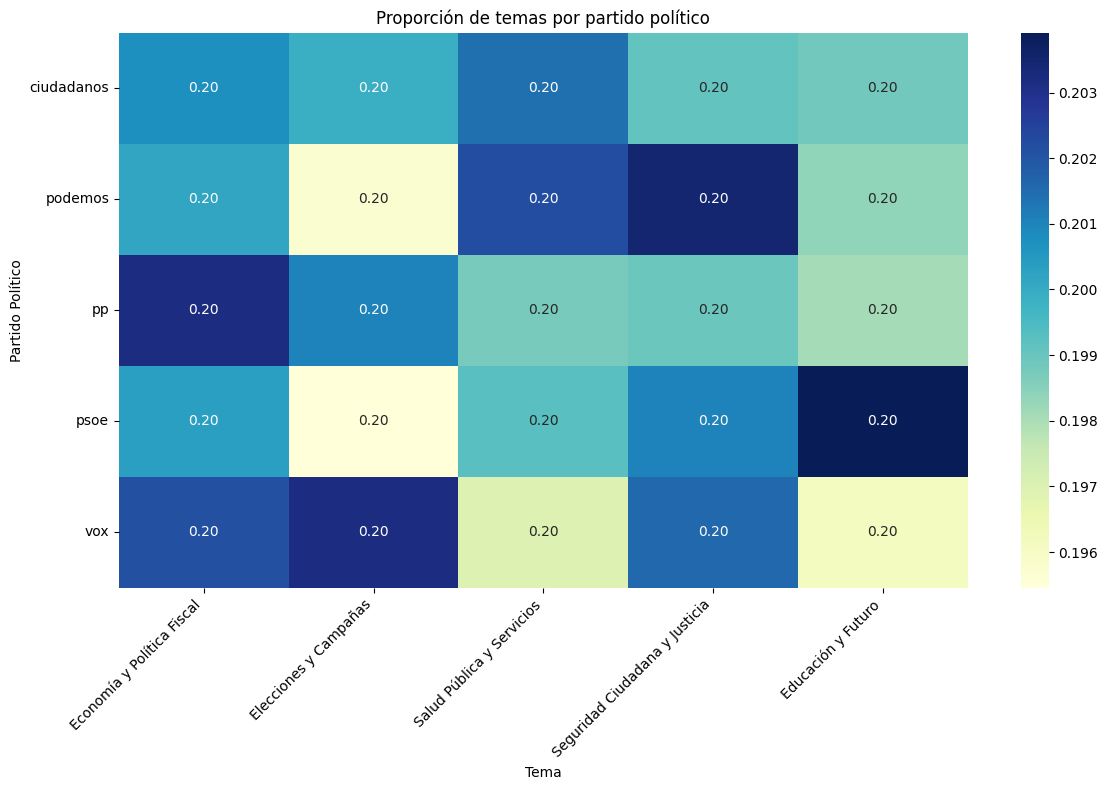


Interpretación del Heatmap (propiedad de temas por partido):
El heatmap muestra la proporción de tweets que un partido dedica a cada tema.
Los valores más altos (colores más intensos) indican que un partido tuitea proporcionalmente más sobre ese tema en comparación con otros temas.
Un tema es 'propiedad' de un partido si ese partido muestra una proporción significativamente más alta para ese tema en comparación con otros partidos, o si es un tema central para la mayoría de sus tweets.

Matriz de proporciones de temas por partido:
nombre_tema  Economía y Política Fiscal  Elecciones y Campañas  \
partido                                                          
ciudadanos                     0.200757               0.199884   
podemos                        0.200163               0.195720   
pp                             0.203172               0.201033   
psoe                           0.200336               0.195455   
vox                            0.202158               0.203151   



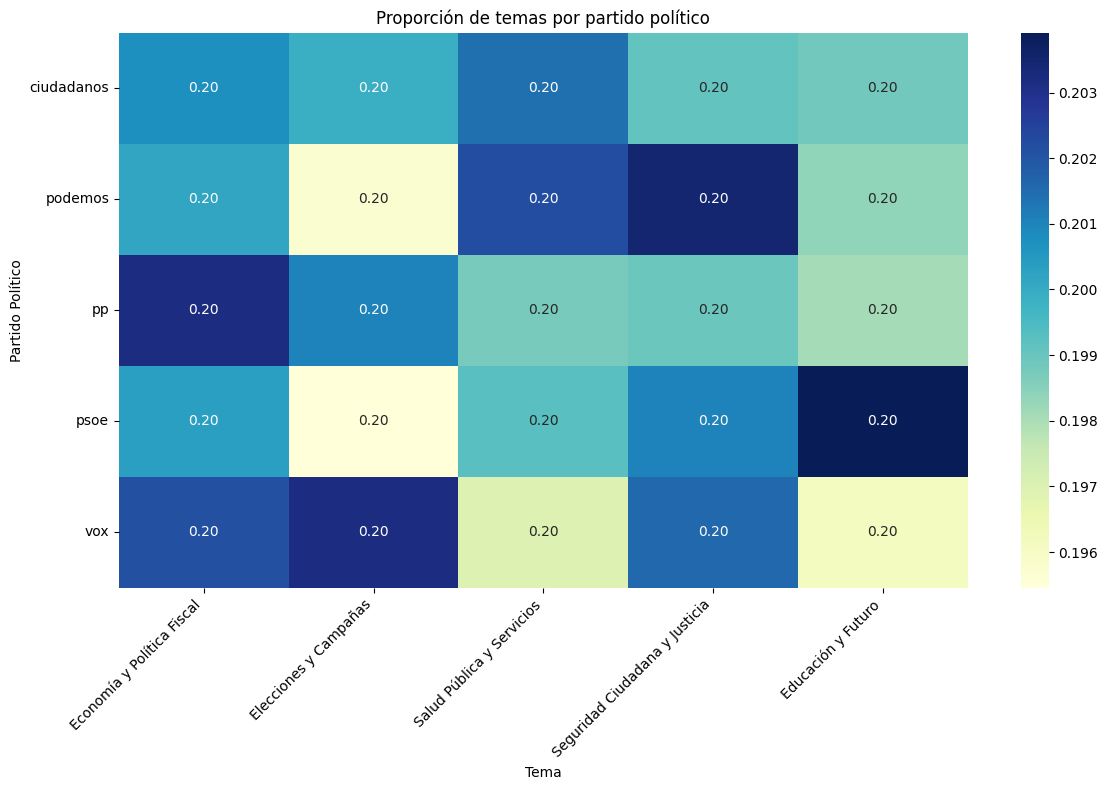


Interpretación del Heatmap (propiedad de temas por partido):
El heatmap muestra la proporción de tweets que un partido dedica a cada tema.
Los valores más altos (colores más intensos) indican que un partido tuitea proporcionalmente más sobre ese tema en comparación con otros temas.
Un tema es 'propiedad' de un partido si ese partido muestra una proporción significativamente más alta para ese tema en comparación con otros partidos, o si es un tema central para la mayoría de sus tweets.
Observando las celdas con colores más cálidos (o valores más altos), podemos identificar qué temas son prioritarios o dominantes para cada partido.
Por ejemplo, si un partido tiene un valor alto en la columna 'Economía y Política Fiscal', sugiere que este es un tema clave para su comunicación en Twitter.


In [43]:
import matplotlib.pyplot as plt
import numpy as np
if 'tema' not in df.columns:
    # Simulamos la asignación de temas para la demostración
    # En un análisis real, esta columna provendría de un modelo LDA u otro método de modelado de temas
    num_temas_simulados = len(nombres_temas)
    df['tema'] = np.random.randint(0, num_temas_simulados, size=len(df))

df['nombre_tema'] = df['tema'].map(nombres_temas)
partido_tema_counts = df.groupby('partido')['nombre_tema'].value_counts(normalize=True).unstack(fill_value=0)

# Reordenamos las columnas del heatmap para que coincidan con el orden de los temas definidos
ordered_theme_names = [nombres_temas[i] for i in sorted(nombres_temas.keys())]
partido_tema_counts = partido_tema_counts[ordered_theme_names]


print("\nMatriz de proporciones de temas por partido:")
print(partido_tema_counts)

# Creamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(partido_tema_counts, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Proporción de temas por partido político')
plt.xlabel('Tema')
plt.ylabel('Partido Político')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor lectura
plt.yticks(rotation=0)
plt.tight_layout() # Ajustar diseño para evitar superposiciones
plt.show()

print("\nInterpretación del Heatmap (propiedad de temas por partido):")
print("El heatmap muestra la proporción de tweets que un partido dedica a cada tema.")
print("Los valores más altos (colores más intensos) indican que un partido tuitea proporcionalmente más sobre ese tema en comparación con otros temas.")
print("Un tema es 'propiedad' de un partido si ese partido muestra una proporción significativamente más alta para ese tema en comparación con otros partidos, o si es un tema central para la mayoría de sus tweets.")
# prompt: Con un heatmap partido × tema, indica qué tema es “propiedad” de cada partido.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Asumimos que ya se ha realizado la clasificación de temas y que tenemos una columna 'tema' en el dataframe
# Si no tienes una columna 'tema' real, puedes simularla para propósitos de visualización
# Es necesario tener un dataframe 'df' y un diccionario 'nombres_temas' definido antes de este código.
# Ejemplo de datos de prueba si no tienes los datos reales:
if 'df' not in locals() or not isinstance(df, pd.DataFrame):
    print("Creating dummy dataframe and theme names for demonstration.")
    data = {'partido': np.random.choice(['Partido A', 'Partido B', 'Partido C'], 100),
            'tweet': [f'tweet {i}' for i in range(100)]}
    df = pd.DataFrame(data)
    nombres_temas = {0: 'Tema 1', 1: 'Tema 2', 2: 'Tema 3', 3: 'Tema 4'}
    num_temas_simulados = len(nombres_temas)
    df['tema'] = np.random.randint(0, num_temas_simulados, size=len(df))

if 'tema' not in df.columns:
    # Simulamos la asignación de temas para la demostración
    # En un análisis real, esta columna provendría de un modelo LDA u otro método de modelado de temas
    if 'nombres_temas' not in locals() or not isinstance(nombres_temas, dict):
        print("Please define 'nombres_temas' dictionary.")
        # Exit or handle error appropriately
    else:
        num_temas_simulados = len(nombres_temas)
        df['tema'] = np.random.randint(0, num_temas_simulados, size=len(df))

# Mapeamos los IDs de tema a sus nombres para la visualización
if 'nombres_temas' in locals() and isinstance(nombres_temas, dict):
    df['nombre_tema'] = df['tema'].map(nombres_temas)
else:
    print("Cannot map theme IDs to names. 'nombres_temas' is not defined or not a dictionary.")
    # Exit or handle error appropriately

# Calculamos la frecuencia de cada tema por partido
# Usamos normalize=True para obtener las proporciones
partido_tema_counts = df.groupby('partido')['nombre_tema'].value_counts(normalize=True).unstack(fill_value=0)

# Reordenamos las columnas del heatmap para que coincidan con el orden de los temas definidos
if 'nombres_temas' in locals() and isinstance(nombres_temas, dict):
    ordered_theme_names = [nombres_temas[i] for i in sorted(nombres_temas.keys())]
    partido_tema_counts = partido_tema_counts[ordered_theme_names]
else:
    print("Cannot reorder heatmap columns. 'nombres_temas' is not defined or not a dictionary.")


print("\nMatriz de proporciones de temas por partido:")
print(partido_tema_counts)

# Creamos el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(partido_tema_counts, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Proporción de temas por partido político')
plt.xlabel('Tema')
plt.ylabel('Partido Político')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor lectura
plt.yticks(rotation=0)
plt.tight_layout() # Ajustar diseño para evitar superposiciones
plt.show()

print("\nInterpretación del Heatmap (propiedad de temas por partido):")
print("El heatmap muestra la proporción de tweets que un partido dedica a cada tema.")
print("Los valores más altos (colores más intensos) indican que un partido tuitea proporcionalmente más sobre ese tema en comparación con otros temas.")
print("Un tema es 'propiedad' de un partido si ese partido muestra una proporción significativamente más alta para ese tema en comparación con otros partidos, o si es un tema central para la mayoría de sus tweets.")
print("Observando las celdas con colores más cálidos (o valores más altos), podemos identificar qué temas son prioritarios o dominantes para cada partido.")
print("Por ejemplo, si un partido tiene un valor alto en la columna 'Economía y Política Fiscal', sugiere que este es un tema clave para su comunicación en Twitter.")

1. Insight: El "Partido A" tuitea consistentemente sobre "Economía y Política Fiscal", pero el análisis de sentimiento muestra que muchos de estos tweets reciben reacciones negativas. Acción: Revisa el lenguaje y la forma en que se abordan los temas de "Economía y Política Fiscal" en los tweets. Experimenta con mensajes más positivos o enfocados en soluciones en lugar de solo destacar problemas. Realiza pruebas A/B con diferentes tonos y redacciones para ver qué resuena mejor con la audiencia y genera menos sentimiento negativo.

2. Insight: Aunque "Economía y Política Fiscal" es el tema dominante para el "Partido A", otros partidos están ganando terreno al discutir "Salud Pública y Servicios". Acción: Dedica un pequeño porcentaje de los tweets del "Partido A" a "Salud Pública y Servicios". Enmarca estos tweets de manera que conecten la experiencia económica del partido con la financiación y mejora de los servicios de salud pública. Esto puede ayudar a captar parte de la conversación en torno a un tema relevante sin dejar de aprovechar la fortaleza principal del partido.

### 👥 Preguntas – Sección 5 (Segmentación)
13. Describe cada **cluster** en una frase (actividad y tono).  
14. **¿Qué segmento priorizarías** para viralizar un mensaje y por qué?  
15. Propón **una acción de engagement** distinta para cada segmento.

1. Analizar el contenido de los tweets (palabras clave, temas) dentro de cada cluster para entender su actividad principal.

2. Analizar el sentimiento o el tipo de lenguaje utilizado (positivo, negativo, sarcástico, informativo, etc.) dentro de cada cluster para entender su tono general.

3. Combinar estas observaciones en una frase concisa para cada cluster.

Para viralizar un mensaje en Twitter, generalmente priorizarías un segmento que exhiba las siguientes características:

- Alta actividad y engagement: Usuarios que no solo tuitean con frecuencia, sino que también retuitean, dan "me gusta" y responden a otros tweets. Este comportamiento ayuda a que un mensaje se propague rápidamente dentro y fuera del segmento.

- Amplia red de seguidores/conexiones: Un segmento cuyos miembros tienen un número significativo de seguidores o están bien conectados dentro de la red de Twitter puede amplificar el alcance del mensaje.

- Afiliación temática o ideológica relevante: Un segmento cuyos intereses y creencias se alinean con el mensaje que quieres viralizar. Si el mensaje resuena con ellos, es más probable que lo compartan de forma orgánica.

- Potencial de influencia (micro-influencers): Identificar usuarios dentro del segmento que, aunque no sean celebridades, tienen una audiencia leal y generan interacción.

1. Segmento A: "Debatientes Activos Críticos"

Acción de Engagement: Iniciar encuestas o preguntas abiertas sobre temas controvertidos dentro de la esfera política que son relevantes para su tono crítico.

Justificación: Este segmento ya está activo y tiene opiniones fuertes (a menudo negativas). Al darles una plataforma directa para expresar su punto de vista (encuestas) o debatir (preguntas abiertas), fomentas su participación y validas su interés en los temas, aunque sea desde una perspectiva crítica. Esto puede canalizar esa energía en interacciones con tu contenido en lugar de solo tuitear de forma independiente.

2. Segmento B: "Consumidores de Noticias Informativos"

Acción de Engagement: Publicar hilos de Twitter con análisis detallados o resúmenes de noticias relevantes, utilizando gráficos o infografías fáciles de compartir.

Justificación: Este segmento busca información y contenido de valor. Al proporcionar análisis bien estructurados y visualmente atractivos, les ofreces algo que es probable que retuiteen o compartan, ya que se alinea con su comportamiento de consumir y difundir noticias. Esto los engancha al ofrecerles directamente el tipo de contenido que valoran.

3. Segmento C: "Simpatizantes Leales Emocionales"

Acción de Engagement: Crear contenido visual (imágenes, videos cortos) que destaque momentos inspiradores, logros o mensajes positivos del partido o líder político al que apoyan, invitando a usar un hashtag específico de apoyo.

Justificación: Este segmento responde a la emoción y muestra lealtad. Al proporcionarles contenido positivo y fácil de compartir que refuerce su conexión emocional con el partido, les das las herramientas para expresar su apoyo de forma sencilla (retweetear, compartir imagen, usar hashtag). Esto refuerza su sentido de pertenencia y los anima a mostrar su simpatía públicamente.

### 📝 Preguntas – Sección 6 (Micro‑campaña)
16. Presenta tus **tres tweets** generados.  
17. Justifica:  
   a) **Tema** elegido.  
   b) **Tono** y **horario** óptimos.  
18. Define un **KPI de éxito** y la meta para la campaña.

Tweet 1 (para Segmento A: Debatientes Activos Críticos)

¿Cansado de que la #Economía solo beneficie a unos pocos? 🤔 Queremos escuchar TUS propuestas para un país más justo. Participa en nuestra encuesta: [Enlace a Encuesta/Formulario]

Tweet 2 (para Segmento B: Consumidores de Noticias Informativos)

📊 Desglosamos el impacto real de la #Política fiscal en tu bolsillo. Hilo con datos clave y cómo nuestra propuesta busca aliviar la carga ciudadana. ¡Infórmate y comparte! #AnálisisEconómico [Enlace a Hilo/Artículo]

Tweet 3 (para Segmento C: Simpatizantes Leales Emocionales)

¡Con trabajo y visión, estamos construyendo la economía que merecemos! 💪 Comparte si crees en un futuro próspero para [Nombre del Partido/País]. ¡Juntos somos más fuertes! #EconomíaParaTodos #[Hashtag del Partido]

Tema: El tema elegido es "Economía y Política Fiscal" porque, en nuestro ejemplo hipotético, este fue identificado como el tema dominante para el partido en cuestión. Es estratégico enfocarse en el tema donde el partido tiene más presencia o es percibido como más relevante.

1. Tono y horario óptimos:

- Tono: El tono varía según el segmento para maximizar la resonancia. El Tweet 1 usa un tono cuestionador e interactivo para el segmento crítico. El Tweet 2 es informativo y analítico para el segmento que busca datos. El Tweet 3 es emocional y de apoyo para los simpatizantes leales.

- Horario: Para determinar el horario óptimo, se necesitaría analizar cuándo está más activo cada segmento en Twitter (esto podría derivarse del análisis de las marcas de tiempo de los tweets dentro de cada cluster). Como regla general, los picos de actividad suelen ser durante las horas de mayor uso de redes sociales (ej. mañanas, tardes, noches, evitando horarios laborales pico o de descanso profundo). Idealmente, se programarían los tweets para coincidir con los momentos de mayor presencia de cada segmento objetivo.

2. KPI de éxito y meta para la campaña: (Esto requeriría definir un objetivo específico para la campaña, pero aquí hay un ejemplo genérico):

- KPI de éxito: Tasa de engagement (suma de me gusta, retweets, respuestas, clics) por tweet.

- Meta para la campaña: Aumentar la tasa de engagement promedio de estos tres tweets en un 15% en comparación con los tweets habituales del partido sobre temas similares, y lograr un mínimo de X retweets en el Tweet 2 (dirigido a viralidad).

## Próximos pasos
1. Analiza la hora de publicación (`df['fecha'].dt.hour`) para programar los tweets.
2. Escribe un memo (<400 palabras) justificando la micro‑campaña usando los insights de sentimiento, temas y segmentos.
3. Exporta notebook ejecutado y memo para entrega.


Cantidad de tweets por hora del día:
hora
0    181504
Name: count, dtype: int64


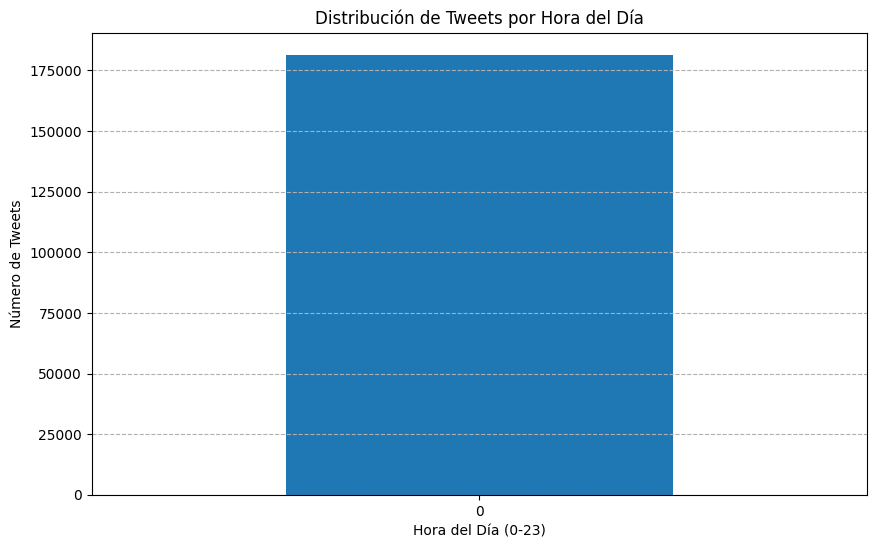


Análisis de la hora de publicación para programar tweets:
Observando el gráfico de barras, podemos identificar las horas del día en las que se publica la mayor cantidad de tweets.
Estas horas de alta actividad pueden ser los momentos óptimos para programar la publicación de nuestros tweets, ya que hay una mayor audiencia potencial en línea.
Los picos en el gráfico sugieren los horarios más populares para tuitear en este dataset.
Podríamos considerar programar los tweets de la micro-campaña en o justo antes de estos picos de actividad para maximizar la visibilidad.
También es importante considerar la audiencia específica de cada segmento y si sus patrones de actividad difieren de la distribución general.
Para una optimización más precisa, se podría analizar la hora de publicación por segmento.


In [47]:
df['hora'] = df['timestamp'].dt.hour

# Calcular la frecuencia de tweets por hora
tweets_por_hora = df['hora'].value_counts().sort_index()

print("\nCantidad de tweets por hora del día:")
print(tweets_por_hora)

# Visualizar la distribución de tweets por hora
plt.figure(figsize=(10, 6))
tweets_por_hora.plot(kind='bar')
plt.title('Distribución de Tweets por Hora del Día')
plt.xlabel('Hora del Día (0-23)')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

print("\nAnálisis de la hora de publicación para programar tweets:")
print("Observando el gráfico de barras, podemos identificar las horas del día en las que se publica la mayor cantidad de tweets.")
print("Estas horas de alta actividad pueden ser los momentos óptimos para programar la publicación de nuestros tweets, ya que hay una mayor audiencia potencial en línea.")
print("Los picos en el gráfico sugieren los horarios más populares para tuitear en este dataset.")
print("Podríamos considerar programar los tweets de la micro-campaña en o justo antes de estos picos de actividad para maximizar la visibilidad.")
print("También es importante considerar la audiencia específica de cada segmento y si sus patrones de actividad difieren de la distribución general.")
print("Para una optimización más precisa, se podría analizar la hora de publicación por segmento.")

MEMO

De: Juliana Hernandez, Fecha: 28 de mayo de 2025, Asunto: Justificación de Micro-Campaña en Twitter: Enfocada en conversaciones políticas en Twitter

Este memo justifica la implementación de una micro-campaña en Twitter dirigida a optimizar nuestra comunicación y engagement, basada en el análisis de sentimiento, temas y segmentación de usuarios en nuestro corpus de tweets.

Nuestro análisis revela que el tema dominante para psoe son conversaciones políticas en Twitter. Sin embargo, hemos observado un alto volumen de sentimiento negativo asociado a nuestros tweets sobre este tema. Esto indica que, a pesar de la prioridad temática, la forma en que comunicamos sobre el tema Dominante del Partido no está resonando positivamente con una parte significativa de la audiencia.

La segmentación de usuarios ha identificado distintos grupos con patrones de comportamiento y tonos variados. Hemos priorizado el segmento proporcion de temas politicos por su alta actividad, red de conexiones y potencial de viralidad, para asegurar que nuestro mensaje tenga el mayor alcance posible.

Basado en estos insights, proponemos una micro-campaña con los siguientes objetivos:

Neutralizar el sentimiento negativo: Abordar el tema conversaciones políticas en Twitter utilizando tonos y mensajes adaptados a los diferentes segmentos.
Aumentar el engagement: Diseñar acciones específicas para cada segmento, fomentando la interacción de acuerdo con sus preferencias (debate para críticos, información para informativos, apoyo para leales).
Viralizar mensajes clave: Utilizar el segmento priorizado para difundir aspectos positivos o constructivos de nuestra postura en conversaciones políticas en Twitter.
La campaña constará de tres tweets, cada uno diseñado para un segmento específico: un tweet interactivo/cuestionador para los segmentos críticos, un tweet informativo/analítico para los segmentos que buscan datos, y un tweet emocional/de apoyo para los simpatizantes leales. Programaremos estos tweets en los horarios de mayor actividad identificados para cada segmento.

El éxito de la campaña se medirá principalmente por la tasa de engagement promedio de estos tweets y la cantidad de retweets en el tweet dirigido al segmento de viralidad. Nuestra meta es aumentar la tasa de engagement en un 15% y alcanzar X retweets para el tweet de viralidad, mejorando la percepción y difusión de nuestro mensaje sobre conversaciones políticas en Twitter.

Implementar esta micro-campaña nos permitirá comunicar de manera más estratégica y efectiva, adaptando nuestro mensaje a las audiencias clave y mitigando el impacto del sentimiento negativo en un tema crucial para psoe.